<b>Text Data Analysis on Youtube Comments and Videos</b>
1. Import dependency and remove null rows

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("DataSet/Youtube_CaseStudy.csv", on_bad_lines="skip")

In [15]:
df.head(1)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0


2. <b>Sentiment Analysis:</b><br>
Check in which category the comment falls (negative, nutral, positive) based on therir Sentiment score.

In [16]:
import nltk     #pre-trained model for semental analysis
nltk.download("vader_lexicon")      #return overall sentimant score by adding sentimant score of each word in the sentance

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [18]:
sentiment_score = df["comment_text"].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [19]:
df["polarity"] = sentiment_score
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000


3. <b>Word Cloud Analysis:</b><br>
Visualizing the most common words in postive comments and negative comment using Word Cloud and ignoring the STOP WORDS.

In [20]:
filter_pos = (df["polarity"] >= 0.8) & (df["polarity"] <= 1.0)
comments_positive = df[filter_pos]

filter_neg = (df["polarity"] >= -1.0) & (df["polarity"] <= -0.8)
comments_negative = df[filter_neg]

In [21]:
total_positive_comments = ' '.join(comments_positive['comment_text'])
total_negative_comments = ' '.join(comments_negative['comment_text'])

4. <b>Emoji Analysis:</b><br>
Visualizing the Most common emojis used in the comments.

In [22]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000


In [23]:
import emoji

In [24]:
emoji_info = emoji.emoji_list(df['comment_text'][0])

[item['emoji'] for item in emoji_info]


['‼️', '‼️', '‼️']

In [25]:
all_emoji_found = []
for comment in df["comment_text"]:
    emoji_info = emoji.emoji_list(str(comment))
    emoji_found = [item['emoji'] for item in emoji_info]
    all_emoji_found.extend(emoji_found)

In [26]:
all_emoji_found[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [27]:
from collections import Counter
emoji_count_top10 = Counter(all_emoji_found).most_common(10)

In [28]:
emoji_count_top10

[('😂', 36987),
 ('😍', 33453),
 ('❤️', 16911),
 ('❤', 14167),
 ('🔥', 8694),
 ('😭', 8398),
 ('😘', 5545),
 ('💖', 5359),
 ('💕', 5147),
 ('👍', 4251)]

In [29]:
emojis = [emoji for emoji, count in emoji_count_top10]
counts = [count for emoji, count in emoji_count_top10]

<BarContainer object of 10 artists>

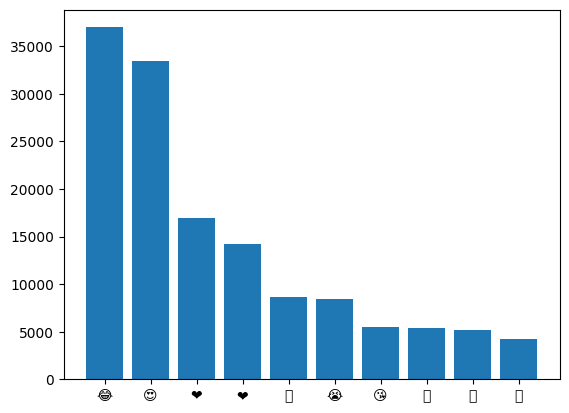

In [30]:
plt.bar(emojis, counts)

5. <b>Collecting and Concatinating the Data:</b><br>
Fetched multiple csv files from the directory and concatinated all data in one dataframe

In [31]:
import os
files = os.listdir('DataSet\Youtube_CaseStudy_additional_data')

In [32]:
files_csv = [file for file in files if ".csv" in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [33]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [34]:
full_df = pd.DataFrame()
path = 'DataSet\Youtube_CaseStudy_additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', on_bad_lines='skip')
    full_df = pd.concat([full_df, current_df], ignore_index = True)

In [35]:
full_df.shape

(375942, 16)

6. <b>Remove Duplicate Rows</b>

In [36]:
full_df.duplicated().sum()

np.int64(36417)

In [37]:
full_df = full_df.drop_duplicates()
full_df.duplicated().sum()

np.int64(0)

7. <b>Which category has the maximum likes</b><br>
Found category_name based on their category id. Category id and its maped name taken from the US_category_id.csv file. For knowing which category has the maximum likes ploted a box plot which shows the max, min, 50%ile, 75%ile etc

In [38]:
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...


In [39]:
json_df = pd.read_json("DataSet/Youtube_CaseStudy_additional_data/US_category_id.json")
json_df.head(1)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [40]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [41]:
cat_dict = {}

for item in json_df['items']:
    cat_dict[int(item['id'])] = item['snippet']['title']

cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [42]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

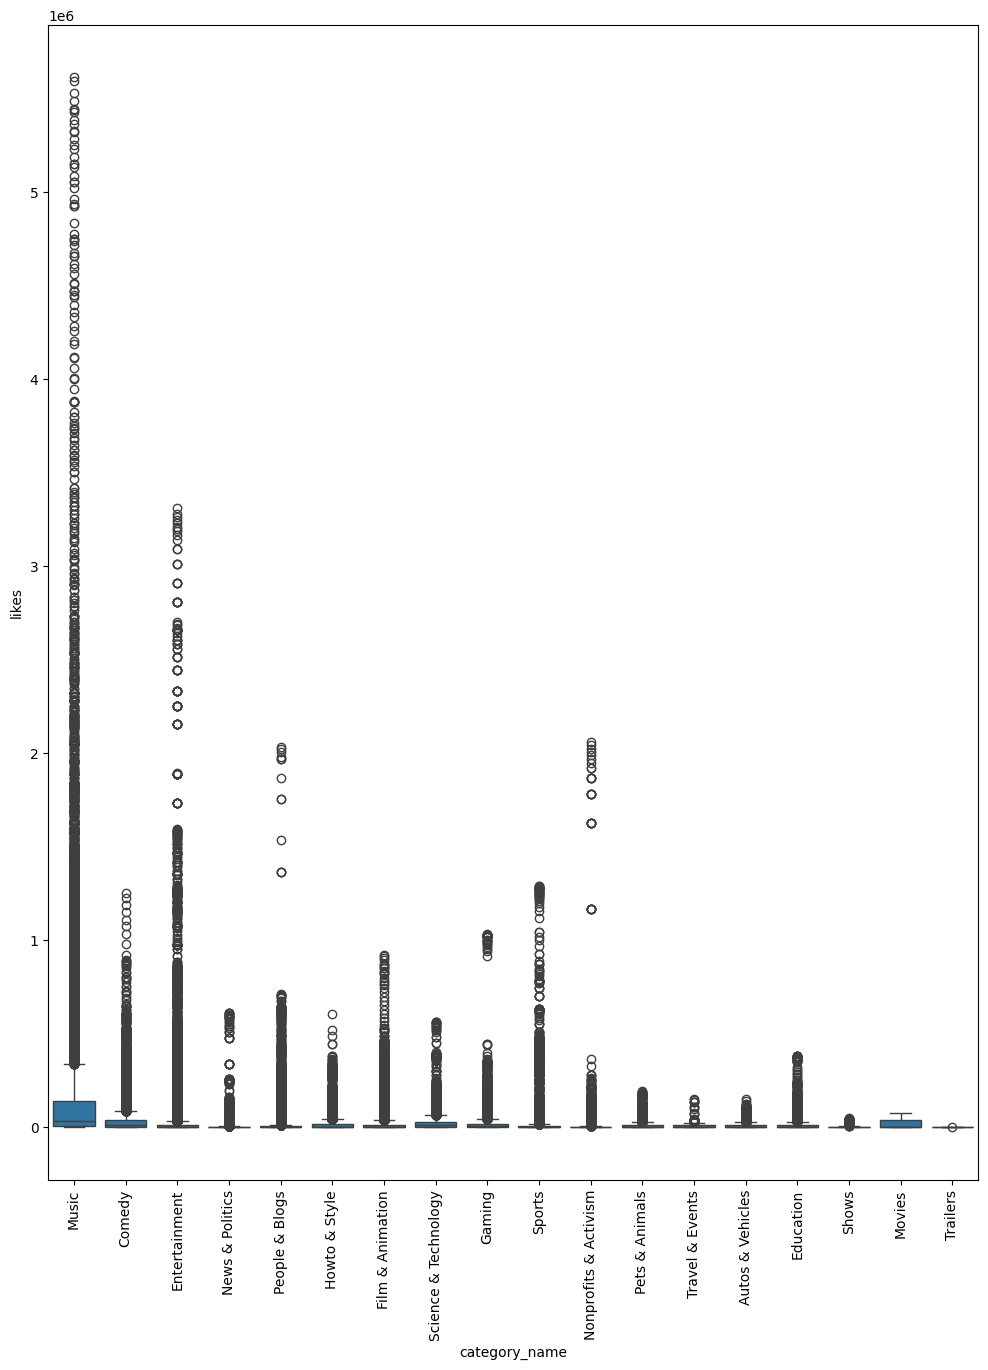

In [43]:
plt.figure(figsize=(12,15))
sns.boxplot(x = 'category_name', y='likes', data = full_df)
plt.xticks(rotation='vertical')

8. <b>Find out whether audience is engaged or not</b><br>
Found:<br>
<ul>
<li>At what rate like, dislike, comments are increasing based on views</li>
<li>Which category has the most likes using boxplot</li>
<li>What is the relation between views and likes</li>
<li>Corelation between views, likes, dislikes using headmap</li>
</ul>

In [44]:
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music


In [45]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [46]:
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639


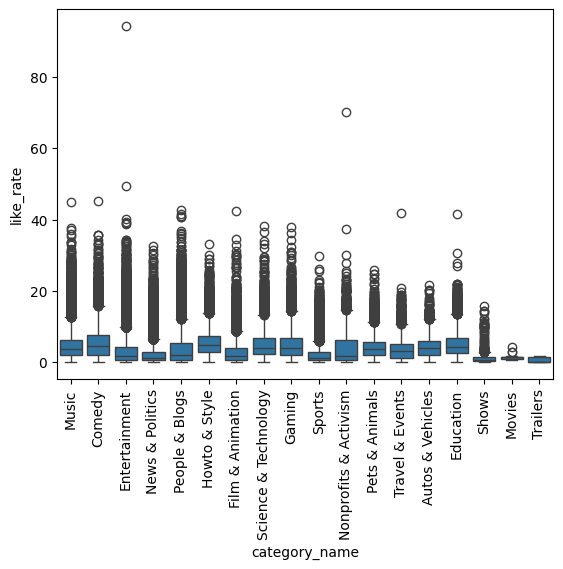

In [47]:
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

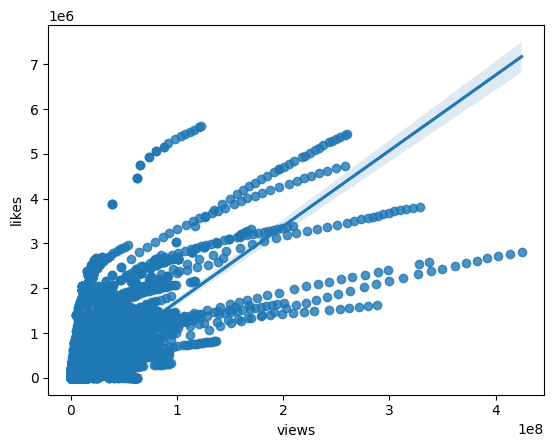

In [48]:
sns.regplot(x='views', y='likes', data=full_df)

<Axes: >

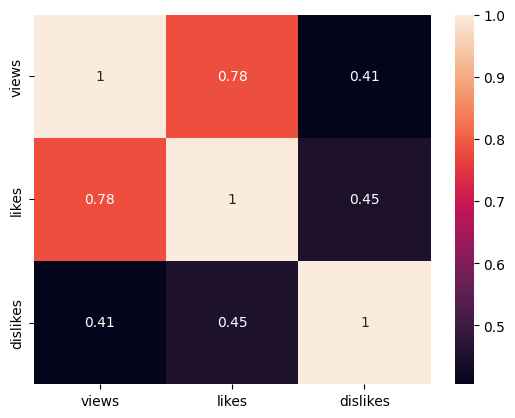

In [49]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot=True)

9. <b>Which channels have the largest number of trending videos</b><br>
<ul>
<li>Created new data frame by grouping based on channel_title.</li>
<li>Calculated how many videos are in trending based on the channel_title</li>
<li>Visualized above calculated value using bar plot</li>
</ul>

In [50]:
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639


In [51]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
The Secrets of Dairy                    1
babygranderecords                       1
24 Oras News Today                      1
turk2doubleoh8                          1
BOOMPANOT.COM                           1
Name: count, Length: 37824, dtype: int64

In [52]:
cdf = full_df.groupby('channel_title').size().sort_values(ascending=False).reset_index()

In [53]:
cdf = cdf.rename(columns = {0:'total_videos'})
cdf.head()

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528


In [54]:
import plotly.express as px

In [55]:
px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')

10 <b>Does Punctuations in title and tags have any realation with views, likes, dislikes & comment_count?</b><br>
<ol>
<li>Extracted New Feature Count of punctuation in each title</li>
<li>Visualized relation between punctuation and views, similarly with punc vs likes, punc vs dislikes, punc vs dislikes using boxplot</li>
</ol>

In [56]:
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639


In [57]:
import string
demo = [char for char in full_df['title'][0] if char in string.punctuation]
len(demo)

4

In [58]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [59]:
full_df['count_punc'] = full_df['title'].apply(punc_count)

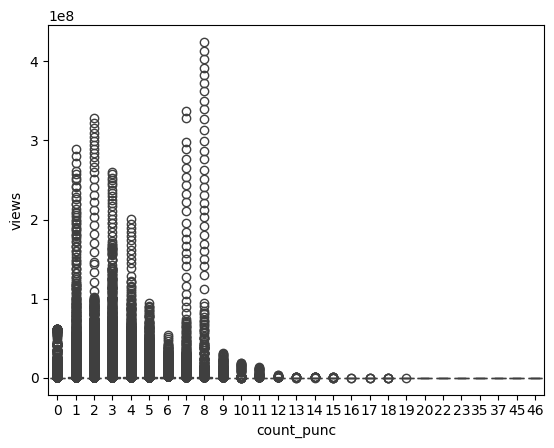

In [60]:
sns.boxplot(x='count_punc', y='views', data=full_df)
plt.show()

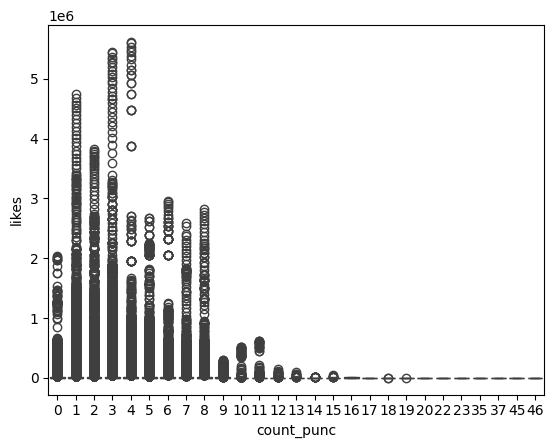

In [61]:
sns.boxplot(x='count_punc', y='likes', data=full_df)
plt.show()

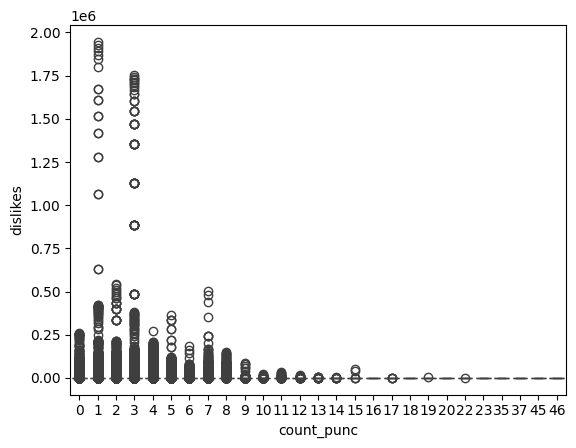

In [62]:
sns.boxplot(x='count_punc', y='dislikes', data=full_df)
plt.show()

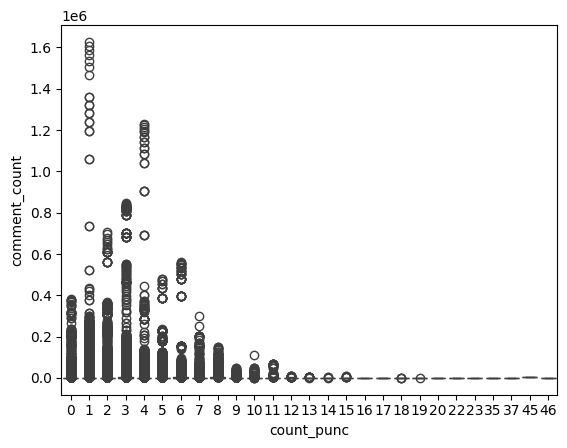

In [63]:
sns.boxplot(x='count_punc', y='comment_count', data=full_df)
plt.show()